# Différences finies: problèmes instationnaires 1D
 
Dans ce notebook, on donne des exemples de codes pour résoudre des problèmes instationnaires utilisant la méthode des différences finies. Pour visualiser les solutions, on utilise des animations.

## Apprendre à faire des animations (sliders) 

Dans cet exemple, on affiche la fonction $\sin (x-at)$ à de différents instants $t$ pour $x\in [0,L]$. On utilise pour cela le widget Slider de matplotlib, qui permet de modifier un paramètre et de rafraîchir les images. 

<IPython.core.display.Javascript object>


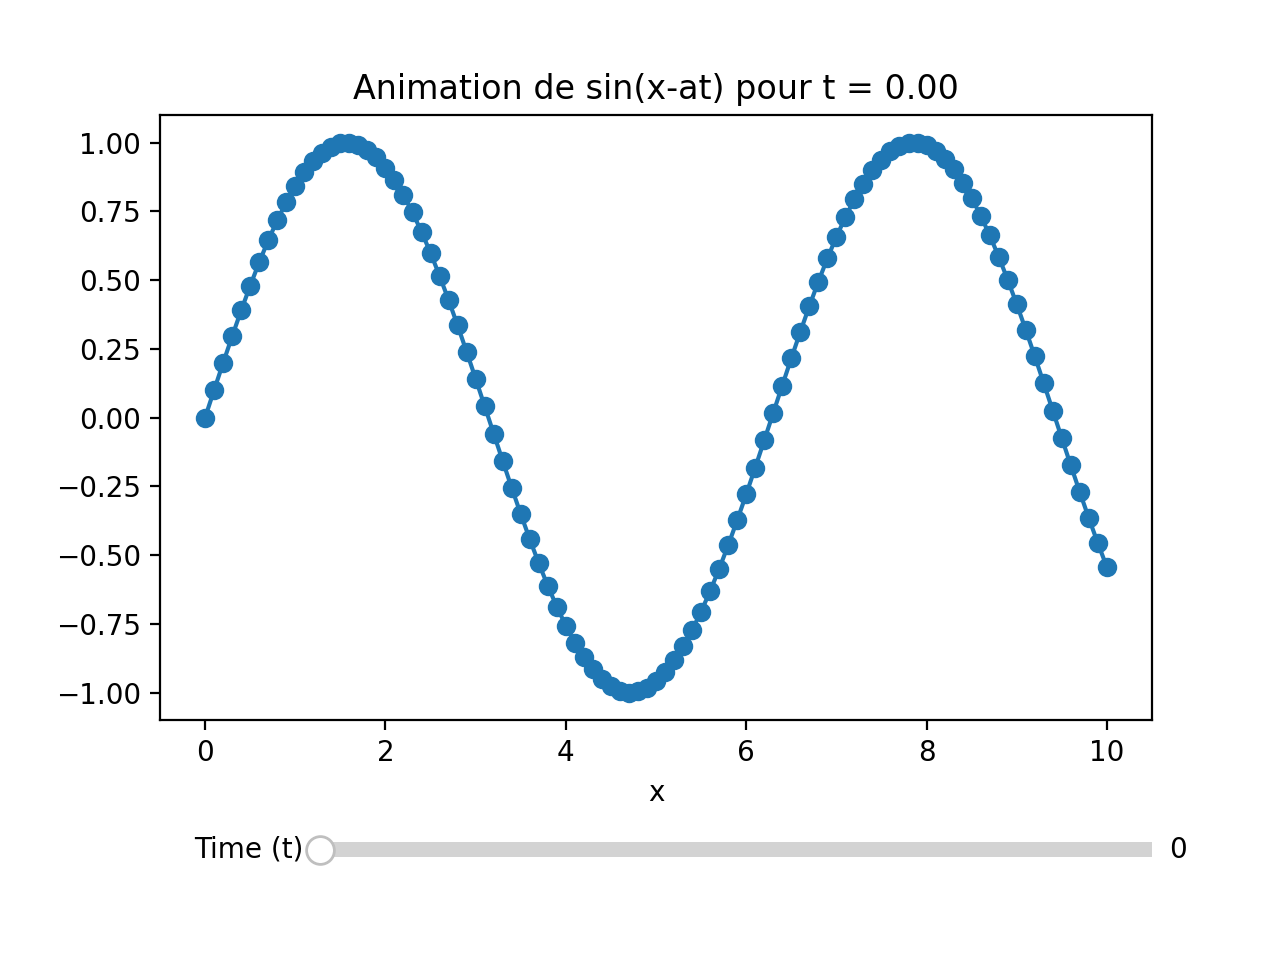

0

In [4]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.widgets import Slider

# Maillage 
L=10      #domaine
M=100     #nombre d'intervalles spatiales
x=np.linspace(0,L,M+1)  #maillage x

# Paramètres
a=1     #vitesse d'advection
T=5     #durée
N=100   #nombre de pas de temps

# Fonction pour mise à jour
def f(a,x,t):
    return np.sin(x-a*t)

# Plot
t = 0
fig, ax = plt.subplots()
line, = ax.plot(x,f(a,x,t),'o-')
plt.title('Animation de sin(x-at) pour t = '+f'{t:4.2f}')
plt.xlabel('x')

# Définition du slider
fig.subplots_adjust(bottom=0.25)
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time (t)',
    valmin=0.0,
    valmax=T,
    valinit=0.0,
)

# Mise à jour du slider
def update(val):
    line.set_ydata(f(a, x, time_slider.val))
    ax.set_title('Animation de sin(x-at) pour t = '+f'{time_slider.val:4.2f}')
    fig.canvas.draw_idle()
    
time_slider.on_changed(update)

## Problème 2.1 du cours : équation d'advection par schéma upwind

On cherche à résoudre le problème d'advection

$$
\frac{\partial f}{\partial t} + a  \frac{\partial f}{\partial x} = 0 \quad , \quad (x,t) \in [0,L] \times [0,T]
$$

Ici on note $a>0$ la vitesse d'advection. Si on fournit une condition initiale

$$
CI \ : \ f(x,0) = F(x)
$$

et une condition aux limite à l'entrée du domaine 

$$
CL \ : \ f(0,t) = F(-at)
$$

alors la solution générale de cette équation sera $F (x- at)$. La fonction $F$ est tout simplement propagé vers des 
$x$ croissants. On choisira $F (x) = \cos(x) $ dans l'exercice. 

On résout ce problème à l'aide d'une méthode de différences finies. On suppose un maillage uniforme

$$
x_j = j \delta x \ , \ j = 0,1,\ldots,M \quad \mbox{avec} \quad \delta x = \frac{L}{M}
$$

et des pas de temps constants

$$
t_n = n \delta t \ , \ n = 0,1,\ldots,N \quad \mbox{avec} \quad \delta t = \frac{T}{N}
$$

et on notera $f(x_j,t_n) = f_j^n $. Si on utilise un schéma explicite UPWIND pour résoudre ce problème, la discrétisation du problème donne le problème matriciel suivant. On initialise 

$$
\underbrace{\left [\begin{array}{c} f_0^0 \\ f_1^0 \\ \vdots  \\ f_M^0 \end{array}\right ]}_{\mathbf{f}^0}  = \left [\begin{array}{c} F (x_0) \\ F (x_1) \\ \vdots \\  F (x_M ) \end{array}\right ]
$$

Ensuite pour tout $n = 0,1,\ldots,N-1$ on itère sur le schéma 

$$
\underbrace{\left [\begin{array}{c} f_0^{n+1} \\ f_1^{n+1} \\ \vdots  \\ f_M^{n+1} \end{array}\right ]}_{\mathbf{f}^{n+1}} = 
 \underbrace{\left [ \begin{array}{cccc} 
 0 \\ C & 1-C &  \\
  & \ddots & \ddots &   \\
   & & C & 1-C \end{array} \right ]}_{\mathcal{E}} \underbrace{\left [\begin{array}{c} f_0^{n} \\ f_1^{n} \\ \vdots  \\ f_M^{n} \end{array}\right ]}_{\mathbf{f}^{n}}  + \underbrace{\left [\begin{array}{c} F (-a t^{n+1} ) \\ 0 \\ \vdots \\  0 \end{array}\right ]}_{\mathbf{g}^{n+1}}
$$

Ici on note $C = a \delta t / \delta x $. 

<IPython.core.display.Javascript object>


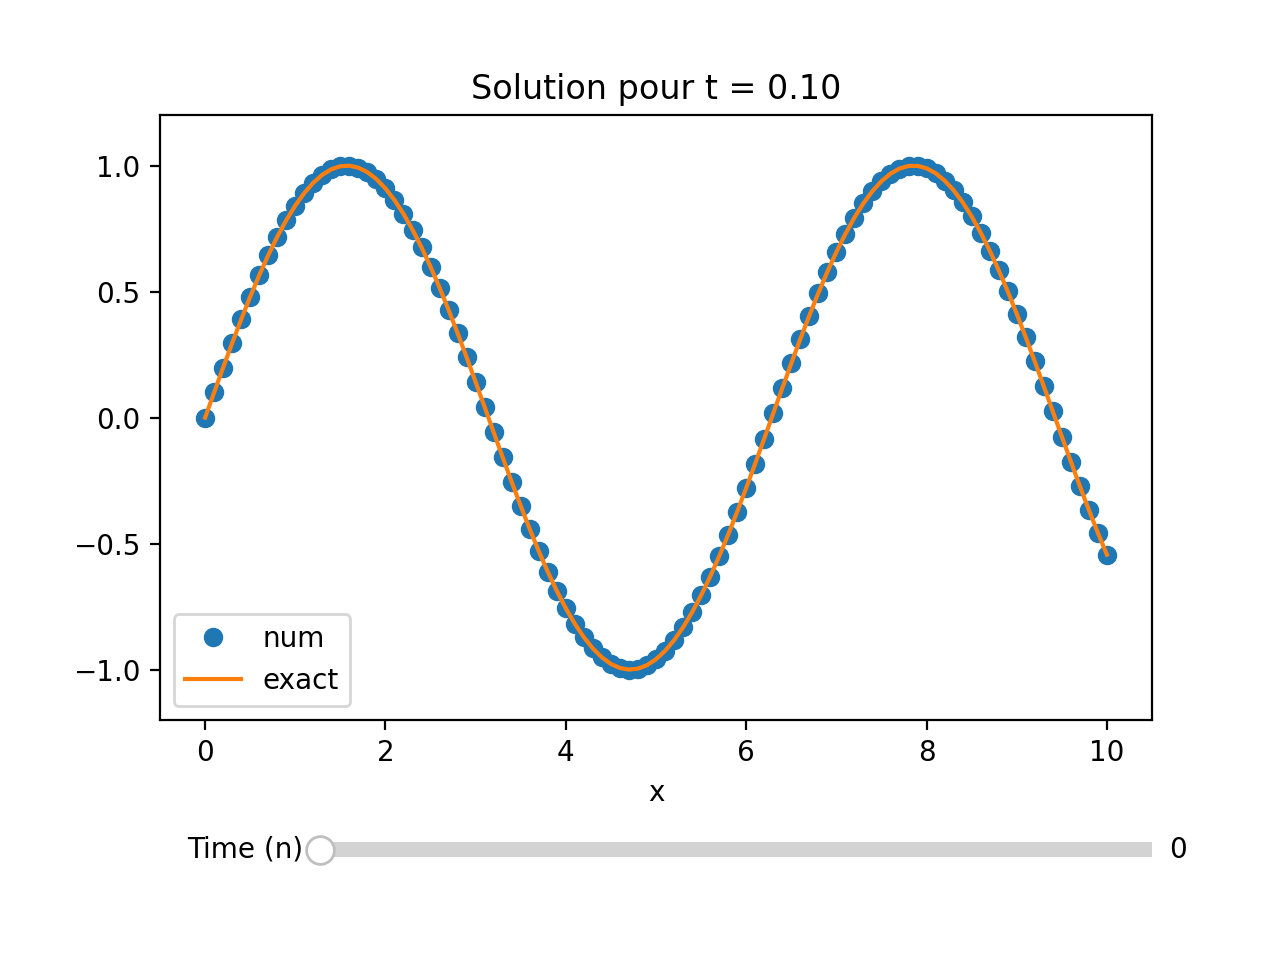

0.9


0

In [26]:
#1. importer les librairies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.widgets import Slider

#2. paramètres
#taille du domaine/temps final
L=10
T=10

#vitesse d'advection
a=0.9

#nombre de points et temps discrets (-1)
M=100
N=100

#pas de temps, pas d'espace et C
dx=L/M
dt=T/N

C=a*dt/dx

#maillage/temps discrets
x=np.linspace(0,L,M+1)
t=np.linspace(0,T,N+1)

#3.matrice E d'évolution et vecteur F
E=np.zeros([M+1,M+1])
for j in range(1,M+1):   #pour j allant de 1 à M
    E[j,j-1]=C
    E[j,j]=1-C
    
#vecteur F du système, sera mis à jour dans la boucle
F=np.zeros(M+1)

#4. initialisation  F(x) = cos (x) à l'instant t=0
f=np.sin(x)
 
#5. boucle d'avancement temporel
F_tot = np.zeros((N+1,M+1)) # vecteur pour le stockage de l'évolution temporelle totale de la solution calculée
F_tot[0,:] = f
F_tot_ex = np.zeros((N+1,M+1)) # vecteur pour le stockage de l'évolution temporelle totale de la solution exacte
F_tot_ex[0,:] = f

for n in range(N):   #pour n allant de 0 a N-1
    
    #mise à jour du vecteur F
    F[0]=np.sin(-a*t[n+1]) 
    
    #mise à jour du vecteur f
    f=np.dot(E,f)+F
    
    #solution exacte
    f_ex=np.sin(x-a*t[n+1]) 
    
    #stockage des solutions
    F_tot[n+1,:] = f
    F_tot_ex[n+1,:] = f_ex
    
#6. plot
fig, ax = plt.subplots()
line, = ax.plot(x,F_tot[0],'o',label='num')
line_ex, = ax.plot(x,F_tot_ex[0],label='exact')
plt.title('Solution pour t = 0.0')
plt.ylim([-1.2,1.2])
plt.legend()
plt.xlabel('x')

#7. print
print(C)

# Définition du slider
fig.subplots_adjust(bottom=0.25)
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time (n)',
    valmin=0,
    valmax=N,
    valinit=0,
    valstep=1,
)

# Mise à jour du slider
def update(val):
    line.set_ydata(F_tot[time_slider.val])
    line_ex.set_ydata(F_tot_ex[time_slider.val])
    ax.set_title('Solution pour t = '+f'{t[time_slider.val+1]:4.2f}')
    fig.canvas.draw_idle()

time_slider.on_changed(update)

## Problème 2.2. du cours : équation de diffusion, Crank-Nicolson

On cherche à résoudre l'équation de diffusion

$$
\frac{\partial f}{\partial t} = \alpha  \frac{\partial^2 f}{\partial x^2} \quad , \quad (x,t) \in [0,L] \times [0,T]
$$

Ici on note $\alpha>0$ le coefficient de diffusion. On fournit une condition initiale

$$
CI \ : \ f(x,0) = 0
$$

et deux conditions aux limites aux extrémités du domaine 

$$
CL \ : \ f(0,t) = 0 \ , \  f(L,t) = 1
$$
 

On résout ce problème à l'aide d'une méthode de différences finies. On suppose un maillage uniforme et des pas de temps constants

$$
x_j = j \delta x \ , \ j = 0,1,\ldots,M \quad \mbox{avec} \quad \delta x = \frac{L}{M}
$$
$$
t_n = n \delta t \ , \ n = 0,1,\ldots,N \quad \mbox{avec} \quad \delta t = \frac{T}{N}
$$

et on notera $f(x_j,t_n) = f_j^n $. Si on utilise un schéma implicite de type CRANK-NICOLSON pour résoudre ce problème, la discrétisation du problème donne le problème matriciel suivant. On initialise 

$$
\underbrace{\left [\begin{array}{c} f_0^0 \\ f_1^0 \\ \vdots  \\ f_M^0 \end{array}\right ]}_{\mathbf{f}^0}  = \left [\begin{array}{c} 0 \\ 0 \\ \vdots \\ 0 \end{array}\right ]
$$

Ensuite pour tout $n = 0,1,\ldots,N-1$ on itère sur le schéma 

$$
\underbrace{\left [ \begin{array}{ccccc} 
 1 \\ -S/2 & 1+S & -S/2  \\
  & \ddots & \ddots & \ddots   \\
   & &  -S/2 & 1+S & -S/2 \\
   & & & & 1\end{array} \right ]}_{\mathcal{O}_g}   
\underbrace{\left [\begin{array}{c} f_0^{n+1} \\ f_1^{n+1} \\  \vdots  \\ f_{M-1}^{n+1}  \\ f_M^{n+1} \end{array}\right ]}_{\mathbf{f}^{n+1}} = \underbrace{\left [ \begin{array}{ccccc} 
 0 \\ S/2 & 1-S & S/2  \\
  & \ddots & \ddots & \ddots   \\
   & &  S/2 & 1-S & S/2 \\
   & & & & 0\end{array} \right ]}_{\mathcal{O}_d}    
\underbrace{\left [\begin{array}{c} f_0^{n} \\ f_1^{n} \\  \vdots  \\ f_{M-1}^{n}  \\ f_M^{n} \end{array}\right ]}_{\mathbf{f}^{n+1}} + \underbrace{\left [\begin{array}{c} 0 \\ 0 \\ \vdots \\ 0 \\ 1 \end{array}\right ]}_{\mathbf{g}^{n+1}}
$$

Ici on note $S = \alpha \delta t / \delta x^2 $. A chaque pas de temps, il faut résoudre le système linéaire $ \mathcal{O}_d   \mathbf{f}^{n+1}  = \mathcal{O}_g   \mathbf{f}^{n} + \mathbf{g}^{n+1}$ pour trouver $ \mathbf{f}^{n+1}$. 


<IPython.core.display.Javascript object>


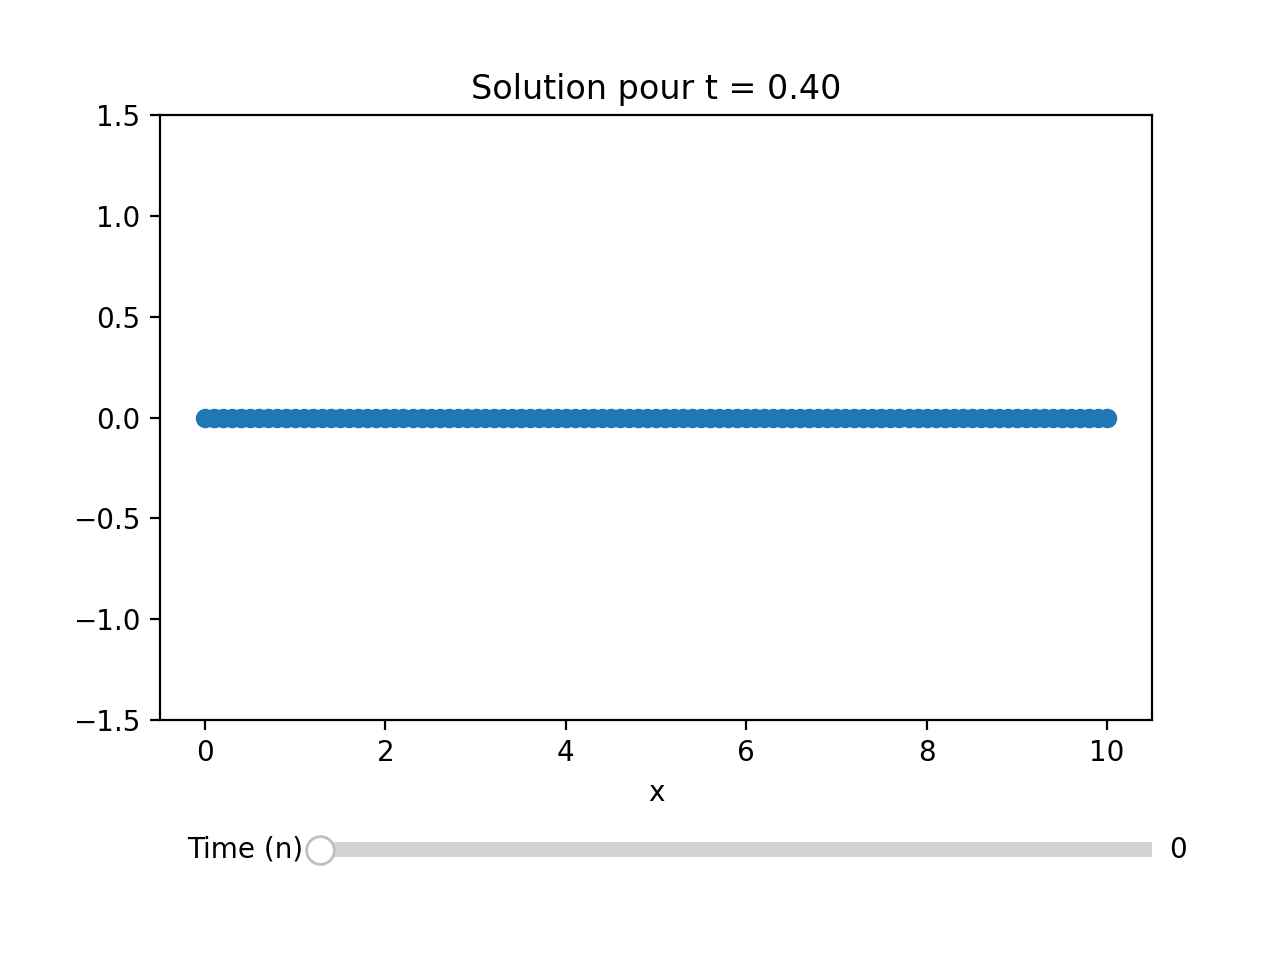

0

In [31]:
#1. importer les librairies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.widgets import Slider

#2. définir constantes/paramètres 
L=10
alpha=50
T=20

M=100
dx=L/M

N=50
dt=T/N

S=alpha*dt/dx**2

#3. Maillage et temps
x=np.linspace(0,L,M+1)
t=np.linspace(0,T,N+1)

#4. Matrice Og et Od et vecteur g
Og=np.zeros([M+1,M+1])
Od=np.zeros([M+1,M+1])
g=np.zeros(M+1)
  
#corriger les lignes des pts de bords (0 et M)
Og[0,0]=1
Og[M,M]=1
g[M]=1

#boucle pour les points int
for j in range(1,M):   #pour j allant de 1 à M-1 (M n'est pas atteint)
    Og[j,[j-1,j,j+1]]=[-S/2,1+S,-S/2]
    Od[j,[j-1,j,j+1]]=[ S/2,1-S, S/2]

#5. initalisation
f=np.zeros(M+1)

#6. boucle temporelle
F_tot = np.zeros((N+1,M+1)) # vecteur pour le stockage de l'évolution temporelle totale de la solution calculée
F_tot[0,:] = f
for n in range(N):  #pour n allant de 0 a N-1
    
    #trouver la solution de Og .dot f_new = Od .dot f_old + g 
    membrededroite=np.dot(Od,f)+g
    f=np.linalg.solve(Og,membrededroite)
    
    #stockage des solutions
    F_tot[n+1,:] = f

#7. Plot
fig, ax = plt.subplots()
line, = plt.plot(x,F_tot[0,:],'o-')
plt.ylim([-1.5,1.5])
plt.title('Solution pour t = 0.0')
plt.xlabel('x')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the time
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time (n)',
    valmin=0,
    valmax=N,
    valinit=0,
    valstep=1,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(F_tot[time_slider.val])
    ax.set_title('Solution pour t = '+f'{t[time_slider.val+1]:4.2f}')
    fig.canvas.draw_idle()

# register the update function
time_slider.on_changed(update)